In [46]:
# Create the years and durations lists
import numpy as np
years = list(np.arange(2011,2021,1))
durations = [103, 101, 99, 100, 100,95,95, 96, 93,90]
# Create a dictionary with the two lists
movie_dict = {'years': years, 'durations': durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


###  Creating a DataFrame from a dictionary

In [47]:
# Import pandas 
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


### A visual of our data

<Figure size 432x288 with 0 Axes>

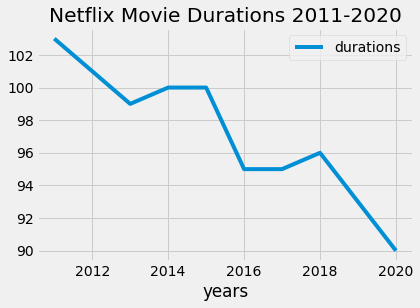

In [48]:
import matplotlib.pyplot as plt
plt.figure()

# Draw a line plot of release_years and durations
durations_df.plot(x = 'years', y = 'durations', kind = 'line', title = 'Netflix Movie Durations 2011-2020')

# Show the plot
plt.show()

### Loading data from a CSV

In [49]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv('C:/Users/S530U/Downloads/archive/netflix_data.csv')

# Print the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  duration  \
0   8/14/2020          2020         4   
1  12/23/2016          2016        93   
2  12/20/2018          2011        78   
3  11/16/2017          2009        80   
4    1/1/2020          2008       123   

                                     

### Filtering for Movies

In [50]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only  = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']] 
# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.loc[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123


### Creating scatter plot

<AxesSubplot:title={'center':'Movie Duration by Year of Release'}, xlabel='Release_Year', ylabel='Duration'>

<Figure size 864x576 with 0 Axes>

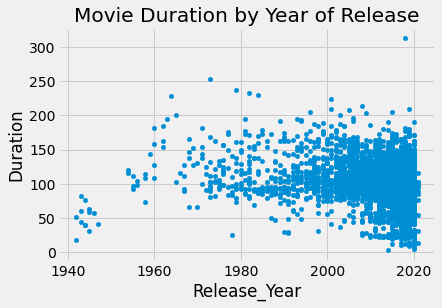

In [51]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration vs year
netflix_movies_col_subset.plot(x = 'release_year', y = 'duration', kind = 'scatter',
    xlabel = 'Release_Year', ylabel = 'Duration',title = 'Movie Duration by Year of Release' )


### Digging deeper

In [52]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration<60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

### Marking non-feature films

In [53]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for value in netflix_movies_col_subset.genre:
    if value=='Children':
        colors.append('red')
    elif value=='Documentaries':
        colors.append('blue')
    elif value=='Stand-Up':
         colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


### Ploting with color

<AxesSubplot:title={'center':'Movie duration by year of release'}, xlabel='Release_Year', ylabel='Duration'>

<Figure size 864x576 with 0 Axes>

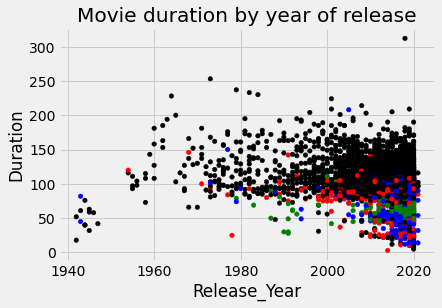

In [54]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
netflix_movies_col_subset.plot(x = 'release_year', y = 'duration', xlabel = 'Release_Year', 
    ylabel = 'Duration', c = colors, kind = 'scatter', title = 'Movie duration by year of release')


